In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

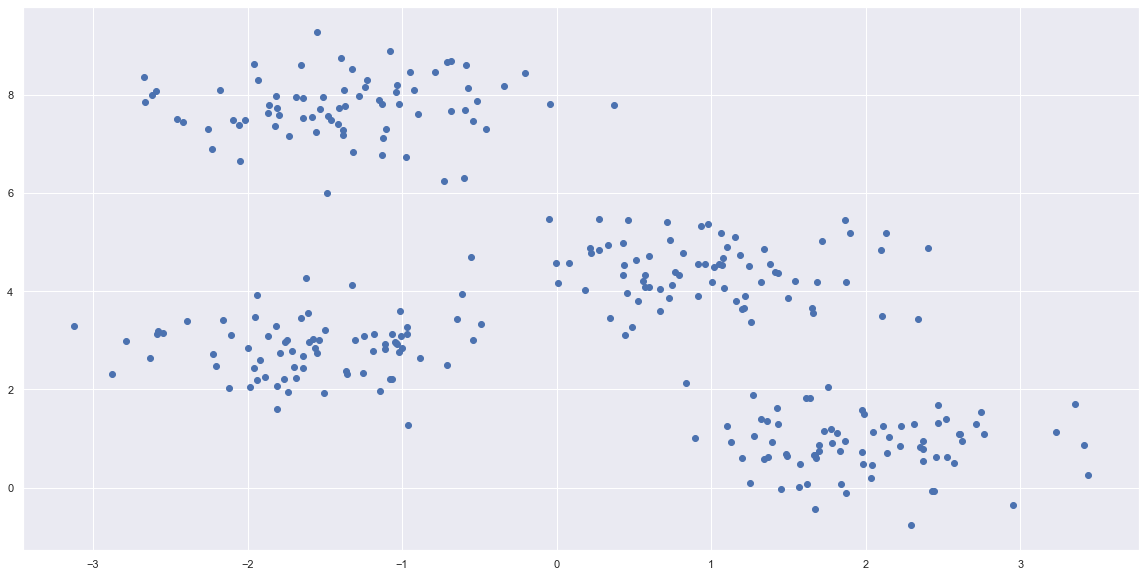

In [18]:
# manually generate dataset
# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
# store the return value to X and y_true
# plot the dataset using plt.scatter()
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.6, random_state=0)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1])
plt.show()



In [19]:
def find_clusters(m, X, n_clusters,rseed=2, init_centers=np.array([])):
#Normal Kmeans algorithm
    if m==1:
# 1. Randomly choose clusters
    #     using np.random.RandomState first to set the seed and store it to a variable r
        r = np.random.RandomState(rseed)
        #     using r.permutation(data shape) to choose first k data point index as initial center.
        k = r.permutation(X)[:n_clusters]
        #     store the center to a list.
        c_list = []
        for point in k:
            c_list.append(point)      
        c_list = np.array(c_list)
      #     repeat until convergence:
      #         Assign labels based on closest center using pairwise_distances_argmin()
      #         Find new centers from means of points: 
      #             Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
      #         check for convergence:
      #             convergence if old center is new center
      #     return the centers and labels
        convergence = 0
        while convergence == 0:
            kl =pairwise_distances_argmin(X,c_list)
            updated_centers = np.zeros([4, 2])
            for center in range(c_list.shape[0]):
                cp_index = np.where(kl == center)
                updated_centers[center][0] = X[cp_index].mean(0)[0]
                updated_centers[center][1] = X[cp_index].mean(0)[1]
            if (np.array_equal(updated_centers,c_list)):
                convergence = 1
            else:
                c_list = updated_centers
            
        return c_list,kl
    if m==2: 
        #Kmeans++ algorithm
      #     repeat until convergence:
      #         Assign labels based on closest center using pairwise_distances_argmin()
      #         Find new centers from means of points: 
      #             Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
      #         check for convergence:
      #             convergence if old center is new center
      #     return the centers and labels
        convergence = 0
        while convergence == 0:
            kl =pairwise_distances_argmin(X,init_centers)
            updated_centers = np.zeros([4, 2])
            for center in range(init_centers.shape[0]):
                cp_index = np.where(kl == center)
                updated_centers[center][0] = X[cp_index].mean(0)[0]
                updated_centers[center][1] = X[cp_index].mean(0)[1]
            if (np.array_equal(updated_centers,init_centers)):
                convergence = 1
            else:
                init_centers = updated_centers
        return init_centers,kl

            
    

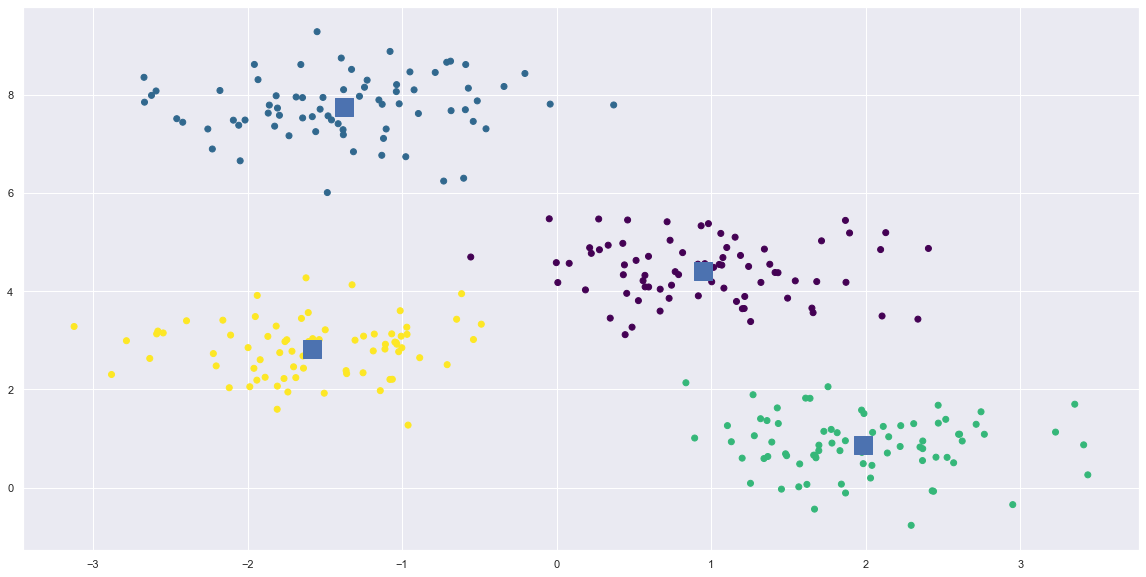

In [20]:
# fit our function to the data set with the starting point rseed=2. 
# plot the figures
centers, kl = find_clusters(1,X,4,2, 1)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=kl,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='s',s=300)
plt.show()

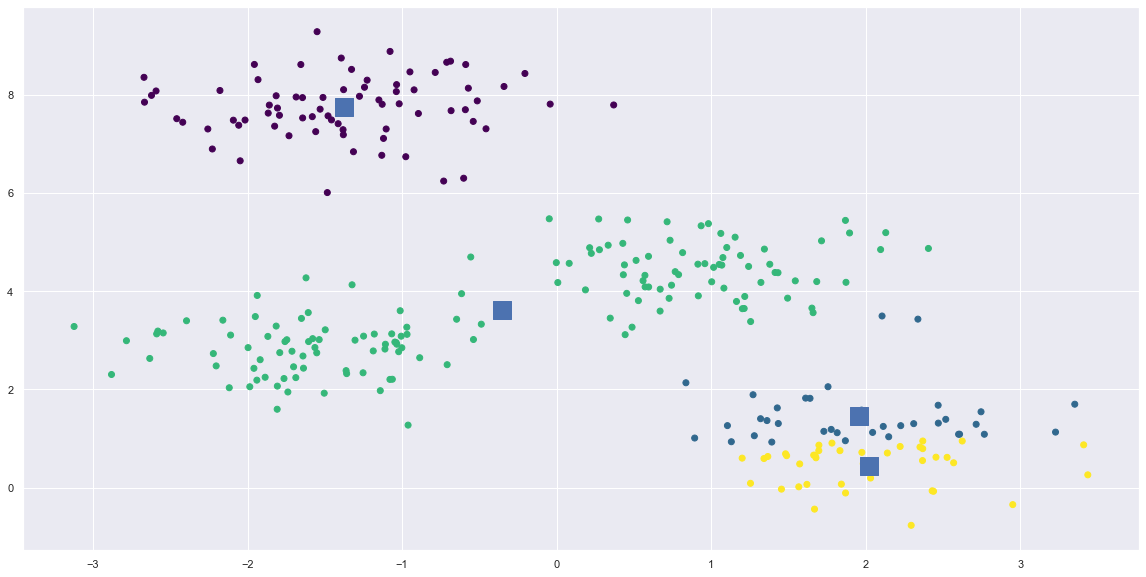

In [21]:
# fit our function to the data set with the starting point rseed=0.
# plot the figure
centers, kl = find_clusters(1, X,4,0,1)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=kl,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='s',s=300)
plt.show()

In [22]:
def eucl_dist(a, b, axis=1):
    # def the function that calculate the L2 distance
    return np.sum((a - b)**2)

# def the init function for kmean++:
# 
def init_center(k,X,rseed):
  #     create a empty list store centers 
    centroid_list = []
  #     random choose a center:
  #         random choose a index:  
  # using np.random.RandomState first to set the seed and store it to a variable r
    r = np.random.RandomState(rseed)
  # using r.permutation(data shape) to choose first data point index as initial center.
    random_index = np.random.randint(0,X.shape[0])
    initial_centroid =   r.permutation(X)[random_index]
  # append this center to the center list
    centroid_list.append(initial_centroid)

    while(len(centroid_list)<k):
        #     while the length of the list less than k:
        #         calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
        #         calculate pj: pj=dj^2/sum_all(d^2) for all data point
        #         random choose j using the probability:
        #             using np.random.choice()
        #         set the new center to be x^j
        points_dj = []
        for b in X:
            centroidtopoint = []
            for a in centroid_list:
                centroidtopoint.append(eucl_dist(a,b))
            dj = np.array(min(centroidtopoint))
            points_dj.append(dj)

        points_pj = []
        for d in points_dj:
            pj=(d**2)/(np.sum(np.square(points_dj)))
            pj = np.array(pj)
            points_pj.append(pj)


        j = np.random.choice(X.shape[0],p=points_pj)
        new_center = X[j]
        centroid_list.append(new_center)
        
#         append the new center to center list
    c_list = np.zeros([4,2])
    for centroid in range(len(centroid_list)):
        c_list[centroid][0] = centroid_list[centroid][0]
        c_list[centroid][1] = centroid_list[centroid][1]

      #     return all centers
    return c_list


In [23]:
# def the kmean++:
def kmpp(X, n_clusters,rseed):
    # first init centers
    init_centers = init_center(n_clusters,X,rseed)
    print("Initial Centroids")
    plt.figure(figsize=(20, 10))
    plt.scatter(X[:,0],X[:,1],cmap='viridis')
    plt.scatter(init_centers[:, 0],init_centers[:, 1],marker='s',s=300)
    plt.show()

    # then, run the k-means with the initialized centers.
    centers, kl = find_clusters(2,X,n_clusters,rseed, init_centers)
    return centers, kl

Initial Centroids


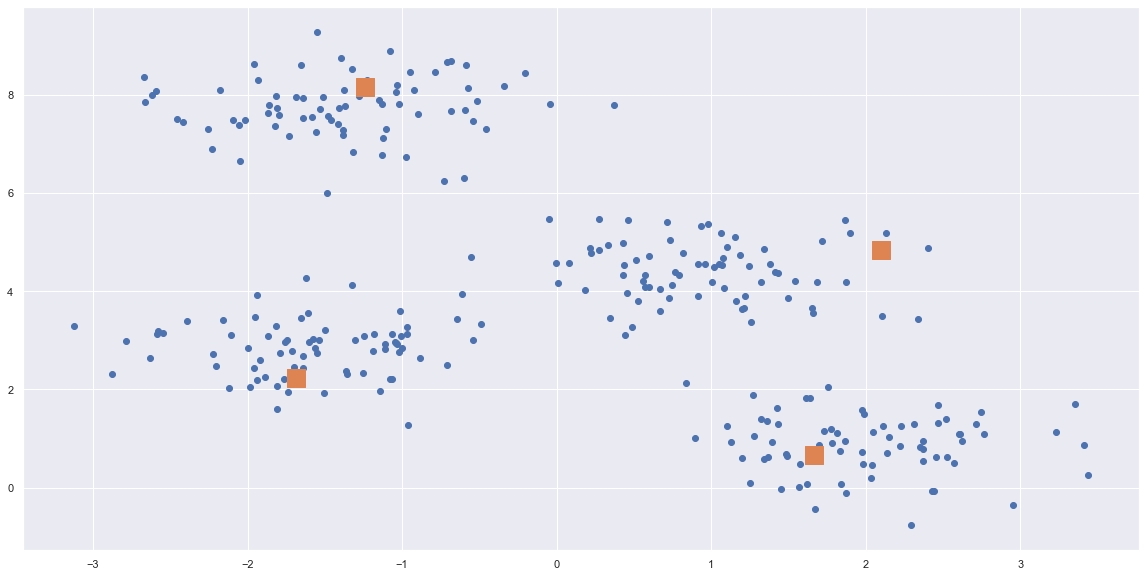

Clustered Data: 


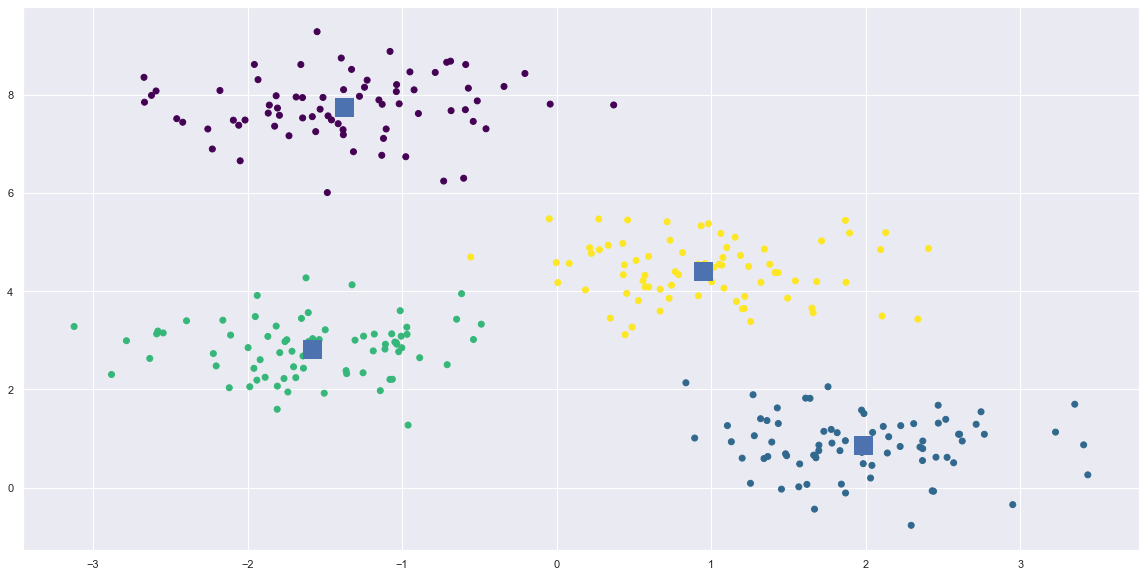

In [24]:
# fit our kmean++ function to the data set with rseed=2.
# plot the figure
centers, kl = kmpp(X,4,2)
print("Clustered Data: ")
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=kl,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='s',s=300)
plt.show()

Initial Centroids


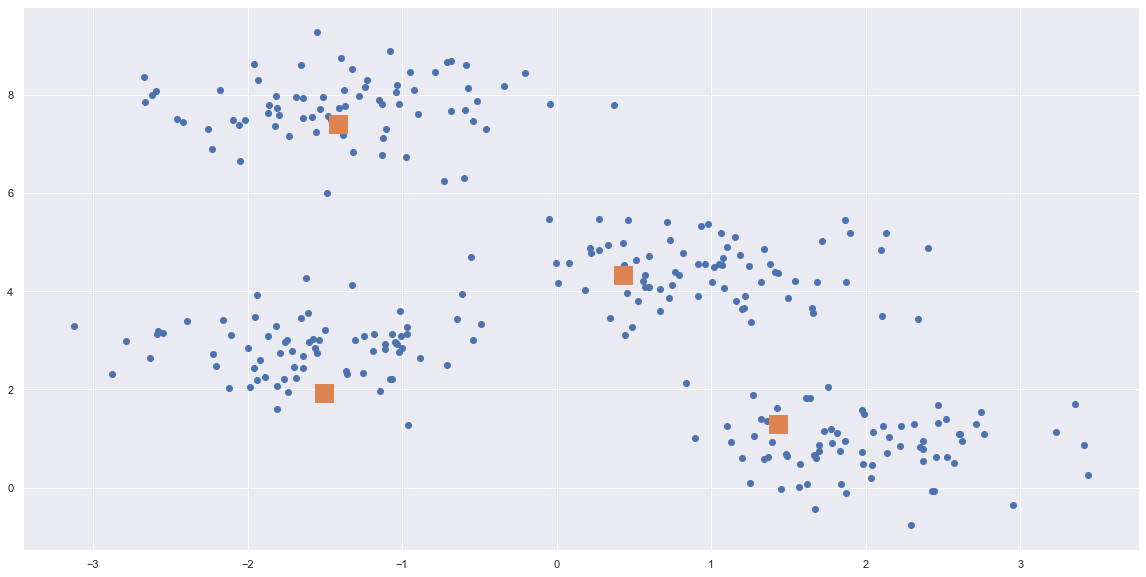

Clustered Data: 


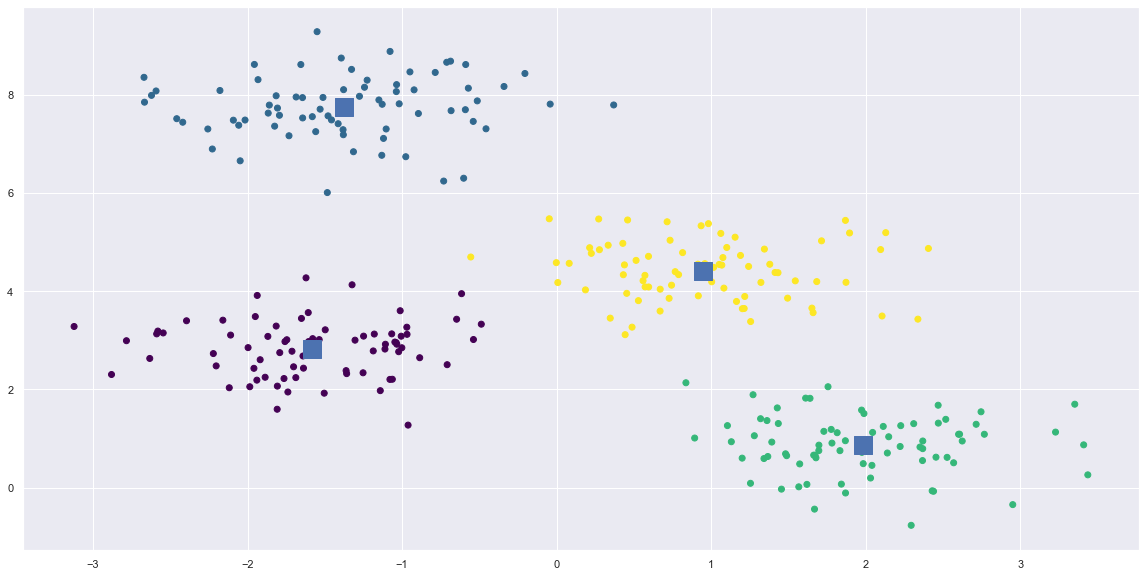

In [25]:
# fit our kmean++ function to the data set with rseed=0.
# plot the figure
centers, kl = kmpp(X,4,0)
print("Clustered Data: ")
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=kl,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='s',s=300)
plt.show()

<b>Compare the results from 4 (seed=0) and 5 (seed=2). Is there any differences? If yes, why?</b>
Utilizing different seeds allows to choose the most optimum seed value that results in the best initial centroids. Setting rseed = 0 gives us a weak initializtion of centroid (as seen in cluster
3) Setting rseed = 2 created 4 relatively seperate clusters, which was our original intent. 


<b>Compare the results from 8 (seed=0 & kmpp) and 9 (seed=2 & kmpp). Is there any differences? If yes, why? </b>
Our kmeans++ algo was created in order to capitalize on the problems presented in the original kmeans algorithm by doing a better initialization. One must still rememember however that kmean++ still depends on a random seed as can be seen with the first initial centroid. Though both rseeds (0 & 2) yielded the intended clusters, rseed=0 can be seen to have intitialized centroids that were further apart from one another, this in turn increases the chance(probability) of having a better clustering.


<b> Compare the results from 4,5,8 and 9. State your observations. </b>
We can observe the clustering from 4(seed=0 & find_clusters),5 (seed=2 & find_clusters),8 (seed=0 & kmpp), and 9 (seed=2 & kmpp) provided interesting results.
We can see that 8 and 9 gave better results because we use the more optimum kmeans++ algorithm. 
Even though 5 gave us essentially the same clusters as  8 and 9, the chance (probablity) of arriving at the 
same results when we use more complex and intricate datasets is lower as the centroid initializations is completely random. Kmeans++ reduces this inefficiency by initializing the centroids via minimizing intra-class 
variance after each k-th iteration.

<B>Please note that when referring to results: </B>


Result 4 = (seed=0 & find_clusters)


Result 5 = (seed=2 & find_clusters) 


Result 8 = (seed=0 & kmpp) 


Result 9 = (seed=2 & kmpp) 